In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

### Homework 2.2 - Heat Transfer

Use the finite differential method to solve a heat transfer equation, given by

$$ \frac{{\partial T}}{{\partial t}} = k\frac{{{\partial ^2}T}}{{\partial {x^2}}} $$

where $T(t, x)$ is the temperature distribution function.

Solve the equation for $x$ between 0 and 1. At $x=0$ the temperature varies as $T(t,0)=sin(10t)$ and at At $x=1$ the temperature varies as $T(t,0)=e^{ - 100 (t - 0.15)^2}$.

Make the animated clip of the temperature distribution function evolution. Pick appropriate time range.

$$ \frac{{{T_{i,j + 1}} - {T_{i,j}}}}{\eta } = k \frac{{{T_{i + 1,j}} - 2{T_{i,j}} + {T_{i - 1,j}}}}{{{\delta ^2}}}$$

$$\begin{array}{l}
{x_i} = i\delta \\
{t_j} = j\eta
\end{array}$$

where $i = 0, 1, 2, ..., N$ and $j = 0, 1, 2, ..., M$

Let $\varepsilon  = \frac{{k\eta }}{{{\delta ^2}}}$
$${T_{i,j + 1}} = \varepsilon \left( {{T_{i + 1,j}} - 2{T_{i,j}} + {T_{i - 1,j}}} \right) + {T_{i,j}}$$

In [2]:
# set nx and nt
nx = 15
nt = 1100

# set x between 0 and 1
x = np.linspace(0, 1, nx)

# delta is the dh term and eta is the dt term
dh = 1/nx # delta
dt = 10/nt # eta

# set k
k = 0.1 # do i make k = 1 ? Is this how this works ?
# No, I don't this is how this works since eps should be < 1
# and now my eps is < 1 so it should be fine...right ? 
# sounds like a famous last words 555

# set epsilon 
eps = (k*dt)/(dh**2)

# set up the grid U (or T in this case)
T = np.zeros((nx,nt))

# set up the boundary conditions 
# the top most
T[0][0] = np.sin(10*1*dt) # 0 is the j 
# the bottom most 
T[-1][0] = np.exp(-100*(0*dt - 0.15)**2)

for j in range(1,nt-1):
    # update all the boundary conditions at time t
    T[0][j] = np.sin(10*(j)*dt) # top most row
    T[-1][j] = np.exp(-100*((j)*dt - 0.15)**2) # bottom most row
    for i in range(1, nx - 1):
        # update all the other positions
        T[i][j+1] = eps*(T[i+1][j]-2*T[i][j]+T[i-1][j]) + T[i][j] 

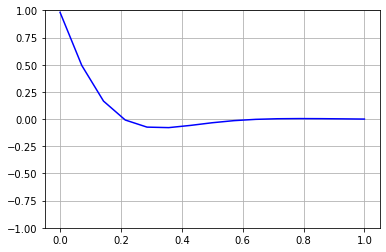

In [3]:
fig1 = plt.figure()
l = plt.plot(x, T[:,0], color = 'blue')
axes = plt.gca()
axes.set_ylim([-1,1])
plt.grid()

def animate(i, line):
    line.set_data(x,T[:,i])
    return line,

ani = animation.FuncAnimation(fig1, animate, 500, fargs = (l), interval = 50, blit = True)
ani.save('Heat_transfer.mp4', fps = 50, extra_args = ['-vcodec', 'libx264'])
plt.show()